In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser='auto')

In [90]:
X['age'] = X['age'].astype(float)
X['age'] = X['age'].fillna(X['age'].mean())

X['fare'] = X['fare'].astype(float)
X['fare'] = X['fare'].fillna(X['age'].mean())

In [91]:
X = X.assign(fare_deciles=pd.qcut(X['fare'], 10, labels=range(1, 11)))

In [92]:
X['age'].max()

80.0

In [93]:
bins = np.linspace(0, X['age'].max(), 9)
bins

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [94]:
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
labels

['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

In [95]:
X = X.assign(age_bin=pd.cut(X['age'], bins=bins, labels=labels))

In [103]:
reg = sm.OLS.from_formula("lived ~ C(age_bin) + C(fare_deciles) + C(sex)",
                    data=X.assign(lived=y.astype(int))).fit()

In [58]:
agg_table = X.assign(lived=y.astype(int)).groupby(['age_bin', 'sex'])['lived'].mean().reset_index()

<AxesSubplot: xlabel='age_bin', ylabel='lived'>

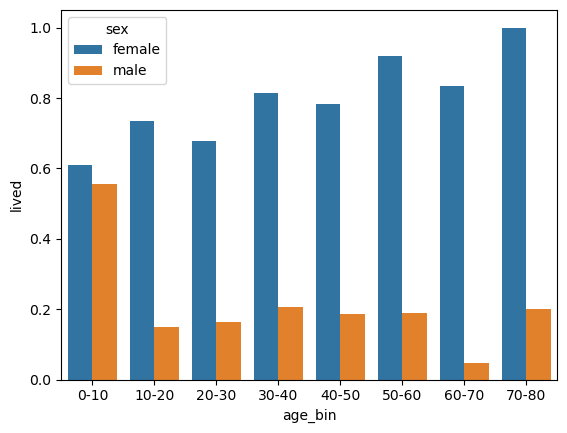

In [59]:
sns.barplot(agg_table, x="age_bin", y="lived", hue="sex")

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X[['age']], y)

LinearRegression()

In [27]:
reg.coef_

array([-0.0018939])